**SPAM VS HAM MAIL PREDICTION**

**Spam mails form an accountable part of our cyberlives.**

**Perhaps, a system to categorize the mails as they reach the inbox - is a simple step that goes a long way.**

**In Machine Learning, a number of base and ensemble algorithms are used for effective classifiation.**

**I have explored most of those classification algorithms here.**

**----------------------------------------------------------------------------**

##### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##### **Dataset**

In [3]:
maildf = pd.read_csv("mail_data.csv")
maildf.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
maildf["Message"][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

##### **Label Encoding**

In [5]:
le = LabelEncoder()
target = maildf["Category"]
maildf["Category"] = le.fit_transform(maildf["Category"])

In [6]:
maildf["Category"]

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

##### **The Split**

In [7]:
X = maildf.drop(columns=['Category'])
y = maildf["Category"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3900, 1), (1672, 1), (3900,), (1672,))

##### **Imbalance upsampling**

In [10]:
from collections import Counter
Counter(y_train)

Counter({0: 3372, 1: 528})

(array([3372.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         528.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

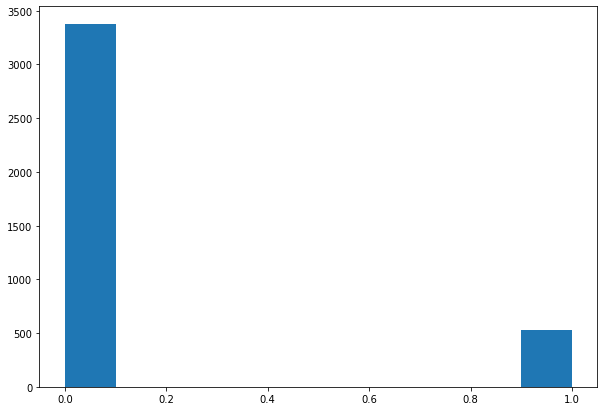

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(y_train)

In [12]:
train = pd.concat([X_train["Message"], y_train], axis=1)

In [13]:
train

,Message,Category
1852,Dunno da next show aft 6 is 850. Toa payoh got...,0
4507,When are you guys leaving?,0
1974,I had askd u a question some hours before. Its...,0
2678,Where in abj are you serving. Are you staying ...,0
4126,May b approve panalam...but it should have mor...,0
...,...,...
2778,Kind of. Took it to garage. Centre part of exh...,0
5318,"Good morning, my Love ... I go to sleep now an...",0
3467,"Actually fuck that, just do whatever, do find ...",0
15,"XXXMobileMovieClub: To use your credit, click ...",1


In [14]:
# Upsampling

train_minority = train[train["Category"]==1]

from sklearn.utils import resample
minority_upsampled = resample(train_minority, replace=True, n_samples=2860)           # 3380-520 = 2860
# minority_upsampled = resample(y_train_minority, replace=True, n_samples=500)

train_upsampled = pd.concat([train, minority_upsampled])

In [15]:
Counter(train_upsampled["Category"])

Counter({0: 3372, 1: 3388})

In [16]:
train_upsampled

,Message,Category
1852,Dunno da next show aft 6 is 850. Toa payoh got...,0
4507,When are you guys leaving?,0
1974,I had askd u a question some hours before. Its...,0
2678,Where in abj are you serving. Are you staying ...,0
4126,May b approve panalam...but it should have mor...,0
...,...,...
1574,SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 a...,1
3709,Free Top ringtone -sub to weekly ringtone-get ...,1
3885,A link to your picture has been sent. You can ...,1
527,Today's Offer! Claim ur £150 worth of discount...,1


In [17]:
train_upsampled.shape

(6760, 2)

(array([3372.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3388.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

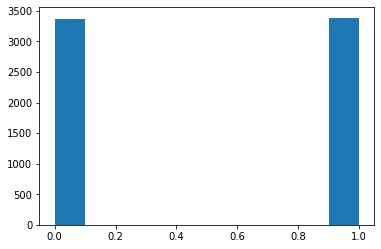

In [18]:
plt.hist(train_upsampled["Category"])

Redefining the train datasets --> X_train, y_train

In [19]:
X_train = train_upsampled.drop(columns=["Category"])
y_train = train_upsampled["Category"]

In [20]:
Counter(y_test)

Counter({0: 1453, 1: 219})

##### **Feature Extraction**

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction = TfidfVectorizer(min_df =1, stop_words = 'english', lowercase='True')
# feature_extraction = TfidfVectorizer()

X_train_features = feature_extraction.fit_transform(X_train['Message'])
X_test_features = feature_extraction.transform(X_test['Message'])

In [22]:
y_train = y_train.astype('int')
y_test  = y_test.astype('int')

In [23]:
print(X_train_features)

  (0, 551)	0.42507180956556073
  (0, 2897)	0.21222598727034814
  (0, 4611)	0.40618555459658573
  (0, 6211)	0.40618555459658573
  (0, 635)	0.42507180956556073
  (0, 798)	0.32821301120314494
  (0, 1949)	0.24285276667494
  (0, 2289)	0.3113091505591589
  (1, 3679)	0.7774851141513733
  (1, 2974)	0.6289013414463558
  (2, 902)	0.46943174706538
  (2, 3176)	0.4821719335433709
  (2, 4979)	0.46750091373326363
  (2, 999)	0.5732250491811708
  (3, 1953)	0.4164565084026064
  (3, 5809)	0.47796540516442293
  (3, 5437)	0.5468606075020941
  (3, 710)	0.5468606075020941
  (4, 4803)	0.5143005098392366
  (4, 4544)	0.6064218769054681
  (4, 945)	0.6064218769054681
  (5, 734)	0.3141909503731
  (5, 1879)	0.3586244079430164
  (5, 3763)	0.2744969750024179
  (5, 604)	0.3814409249203865
  :	:
  (6758, 285)	0.2263462598528206
  (6758, 6561)	0.2140026816617059
  (6758, 4417)	0.22695253447912034
  (6758, 5887)	0.23734730251067235
  (6758, 1899)	0.18411146514807616
  (6758, 6787)	0.23147271185336538
  (6758, 297)	0.1721

In [24]:
X_train_features

<6760x6913 sparse matrix of type '<class 'numpy.float64'>'
	with 73234 stored elements in Compressed Sparse Row format>

In [25]:
feature_extraction.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '077xxx',
 '078',
 '07801543489',
 '07808726822',
 '07815296484',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08006344447',
 '0808',
 '08081263000',
 '0825',
 '083',
 '08448350055',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08701237397',
 '08701417012',
 '08701417012150p',
 '08

In [26]:
X_train["Message"]

1852    Dunno da next show aft 6 is 850. Toa payoh got...
4507                           When are you guys leaving?
1974    I had askd u a question some hours before. Its...
2678    Where in abj are you serving. Are you staying ...
4126    May b approve panalam...but it should have mor...
                              ...                        
1574    SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 a...
3709    Free Top ringtone -sub to weekly ringtone-get ...
3885    A link to your picture has been sent. You can ...
527     Today's Offer! Claim ur £150 worth of discount...
529     You will recieve your tone within the next 24h...
Name: Message, Length: 6760, dtype: object

##### **LogisticRegressionClassifier**

In [27]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()

lor.fit(X_train_features, y_train)

LogisticRegression()

Valuation

In [28]:
y_pred = lor.predict(X_test_features)

Performance Metrics

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score - ", accuracy_score(y_pred, y_test))
print("2. Confusion Matrix - ", confusion_matrix(y_pred, y_test))
print("3. Classification_report - ", classification_report(y_pred, y_test))

1. Accuracy Score -  0.9832535885167464
2. Confusion Matrix -  [[1440   15]
 [  13  204]]
3. Classification_report -                precision    recall  f1-score   support

           0       0.99      0.99      0.99      1455
           1       0.93      0.94      0.94       217

    accuracy                           0.98      1672
   macro avg       0.96      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [30]:
lor.score(X_test_features, y_test)

0.9832535885167464

In [31]:
accuracy_score(y_pred, y_test)

0.9832535885167464

##### **KNearestNeighbors**

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train_features, y_train)

KNeighborsClassifier()

Valuation

In [33]:
y_pred = knn.predict(X_test_features)

Classification metrics

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score - ", accuracy_score(y_pred, y_test))
print("2. Confusion Matrix - ", confusion_matrix(y_pred, y_test))
print("3. Classification_report - ", classification_report(y_pred, y_test))

1. Accuracy Score -  0.94377990430622
2. Confusion Matrix -  [[1452   93]
 [   1  126]]
3. Classification_report -                precision    recall  f1-score   support

           0       1.00      0.94      0.97      1545
           1       0.58      0.99      0.73       127

    accuracy                           0.94      1672
   macro avg       0.79      0.97      0.85      1672
weighted avg       0.97      0.94      0.95      1672



In [35]:
knn.score(X_test_features, y_test)

0.94377990430622

##### **DecisionTreeClassifier**

In [36]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion="entropy", max_depth=10)

dtree.fit(X_train_features, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

Valuation

In [37]:
y_predt = dtree.predict(X_test_features)

In [38]:
y_predt

array([0, 0, 0, ..., 0, 0, 1])

Prediction Metrics

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score - ", accuracy_score(y_predt, y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_predt, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_predt, y_test))

1. Accuracy Score -  0.9449760765550239


2. Confusion Matrix - 
 [[1430   69]
 [  23  150]]


3. Classification_report - 

               precision    recall  f1-score   support

           0       0.98      0.95      0.97      1499
           1       0.68      0.87      0.77       173

    accuracy                           0.94      1672
   macro avg       0.83      0.91      0.87      1672
weighted avg       0.95      0.94      0.95      1672



In [40]:
dtree.score(X_test_features, y_test)

0.9449760765550239

##### **RandomForestClassifier**

In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train_features, y_train)

RandomForestClassifier()

Valuation

In [42]:
y_pred = rfc.predict(X_test_features)

Classification Metrics

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score - ", accuracy_score(y_pred, y_test))
print("2. Confusion Matrix - ", confusion_matrix(y_pred, y_test))
print("3. Classification_report - ", classification_report(y_pred, y_test))

1. Accuracy Score -  0.9820574162679426
2. Confusion Matrix -  [[1450   27]
 [   3  192]]
3. Classification_report -                precision    recall  f1-score   support

           0       1.00      0.98      0.99      1477
           1       0.88      0.98      0.93       195

    accuracy                           0.98      1672
   macro avg       0.94      0.98      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [44]:
rfc.score(X_test_features, y_test)

0.9820574162679426

##### **GradientBoostingClassifier**

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gradboostclass = GradientBoostingClassifier()

gradboostclass.fit(X_train_features, y_train)

GradientBoostingClassifier()

Valuation

In [46]:
y_predg = gradboostclass.predict(X_test_features)

In [47]:
y_predg

array([0, 0, 0, ..., 0, 0, 1])

Performance Metrics

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score - ", accuracy_score(y_predg, y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_predg, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_predg, y_test))

1. Accuracy Score -  0.965311004784689


2. Confusion Matrix - 
 [[1428   33]
 [  25  186]]


3. Classification_report - 

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1461
           1       0.85      0.88      0.87       211

    accuracy                           0.97      1672
   macro avg       0.92      0.93      0.92      1672
weighted avg       0.97      0.97      0.97      1672



In [49]:
gradboostclass.score(X_test_features, y_test)

0.965311004784689

##### **AdaBoostClassifier**

In [50]:
from sklearn.ensemble import AdaBoostClassifier

adaboostclass = AdaBoostClassifier(
    learning_rate=1
)

adaboostclass.fit(X_train_features, y_train)

AdaBoostClassifier(learning_rate=1)

Valuation

In [51]:
y_preda = adaboostclass.predict(X_test_features)

In [52]:
y_preda

array([0, 0, 0, ..., 0, 0, 0])

Performance Matrix

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score - ", accuracy_score(y_preda, y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_preda, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_preda, y_test))

1. Accuracy Score -  0.9671052631578947


2. Confusion Matrix - 
 [[1423   25]
 [  30  194]]


3. Classification_report - 

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1448
           1       0.89      0.87      0.88       224

    accuracy                           0.97      1672
   macro avg       0.93      0.92      0.93      1672
weighted avg       0.97      0.97      0.97      1672



##### **XGBClassifier**

In [54]:
import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train_features, y_train)

XGBClassifier()

Valuation

In [55]:
y_pred = xgb.predict(X_test_features)

Classification metrics

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score - ", accuracy_score(y_pred, y_test))
print("2. Confusion Matrix - ", confusion_matrix(y_pred, y_test))
print("3. Classification_report - ", classification_report(y_pred, y_test))

1. Accuracy Score -  0.9641148325358851
2. Confusion Matrix -  [[1426   33]
 [  27  186]]
3. Classification_report -                precision    recall  f1-score   support

           0       0.98      0.98      0.98      1459
           1       0.85      0.87      0.86       213

    accuracy                           0.96      1672
   macro avg       0.92      0.93      0.92      1672
weighted avg       0.96      0.96      0.96      1672



In [57]:
xgb.score(X_test_features, y_test)

0.9641148325358851

##### **Inference**

**AdaBoostClassifier prevails and predicts the given text precisely with maximum accuracy**

##### **Deployment**

In [58]:
# Pckle dump

import pickle

pickle.dump(adaboostclass, open("adaboostlass.pkl", "wb"))

In [59]:
# Pydantic

!pip install pydantic
from pydantic import BaseModel

class incoming_mail(BaseModel):
  Message : str

  class Config:
    schema_extra = {
        "example" : {
            "Message"  : "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's ",
                    }
    }

In [60]:
# FastAPI

!pip install fastapi
from fastapi import FastAPI

app = FastAPI()

@app.on_event("startup")
def load_model():                                   # path.operation.functiuno
  global model
  model = pickle.load(open("adaboostclass.pkl", "rb"))

@app.get("/")
def index():
  return {"message" : "Homepage of API"}

@app.post("predict")
def get_incoming_mail(data: incoming_mail):
  received = data.dict()
  Message  =  received["Message"]

  pred_name = model.predict([Message]).tolist()[0]
  return {"prediction" : pred_name}

In [61]:
# ColabCode

!pip install colabcode

from colabcode import ColabCode

server = ColabCode(port = 15000, code=False)

In [62]:
server.run_app(app = app)

Public URL: NgrokTunnel: "https://ff43-35-243-217-246.ngrok.io" -> "http://localhost:15000"


##### **END OF THE LINE**